# DATA VISUALIZATIONS

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [3]:
SeriesTV = pd.read_csv("/Users/rm/Desktop/MASTER DATA SCIENCE/TFM/SeriesAll.csv")
SeriesTV.head()

,Unnamed: 0,numberOfEpisodes,Finalization,originalTitle,startYear,endYear,runtimeMinutes,averageRating,numVotes,genre
0,1,86,1,Spooks,2002,2011,60,8.3,12788,drama
1,2,13,1,Randall & Hopkirk (Deceased),2000,2001,50,6.6,503,comedy
2,3,12,1,Beast,2000,2001,29,8.0,68,comedy
3,4,14,0,Baddiel's Syndrome,2001,0,25,4.6,44,comedy
4,5,12,0,Sauvetage,2000,0,52,3.7,6,drama


In [4]:
SeriesTV = SeriesTV.drop('Unnamed: 0', 1)

In [5]:
SeriesTV.describe()

,numberOfEpisodes,Finalization,startYear,endYear,runtimeMinutes,averageRating,numVotes
count,8632.000000,8632.000000,8632.000000,8632.000000,8632.000000,8632.000000,8.632000e+03
mean,26.941265,0.322637,2009.758573,648.489805,38.164736,6.943675,3.773670e+03
std,20.887107,0.467512,5.145061,939.689227,15.249593,1.269821,2.676712e+04
min,7.000000,0.000000,2000.000000,0.000000,11.000000,1.200000,5.000000e+00
25%,12.000000,0.000000,2006.000000,0.000000,25.000000,6.300000,2.300000e+01
50%,20.000000,0.000000,2010.000000,0.000000,30.000000,7.200000,1.060000e+02
75%,36.000000,1.000000,2014.000000,2005.000000,52.000000,7.800000,7.690000e+02
max,99.000000,1.000000,2018.000000,2019.000000,78.000000,9.900000,1.336396e+06


En el resumen de las variables podemos observar que la mayor parte de las series tienen pocos capítulos.

### Let's see if there are correlations between raw data

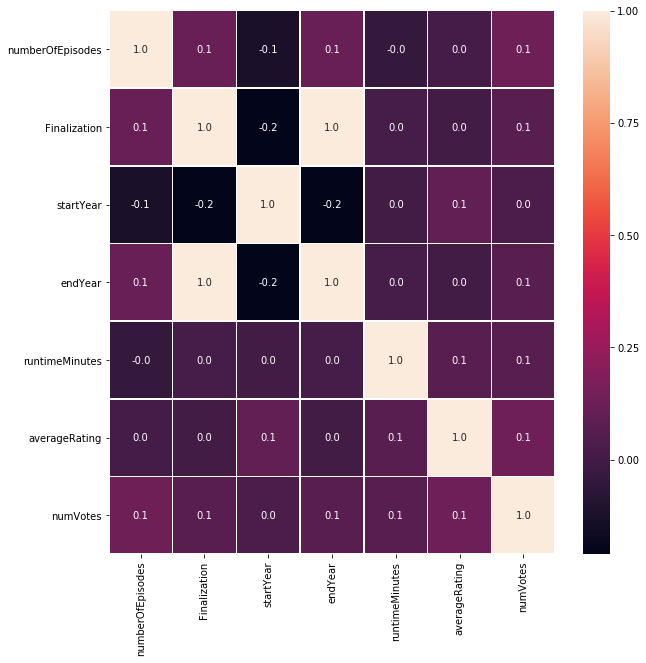

In [6]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(SeriesTV.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

###  The correlations with the number of episodes are very low, zero in variables that in principle might seem to be related. Only being able to highlight the number of votes.


### We are going to visualize the variables

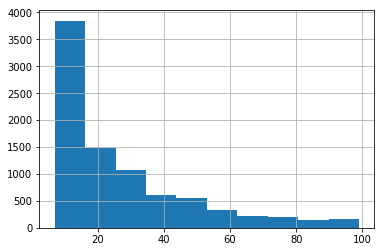

In [7]:
SeriesTV['numberOfEpisodes'].hist()

### It is observed that most of the series have a duration of less than 15 chapters which can generate bias in our model and always predict the values downwards.

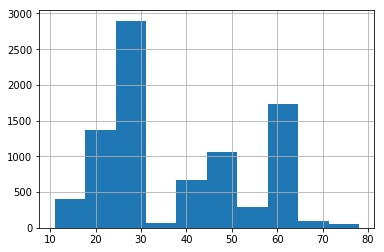

In [8]:
SeriesTV['runtimeMinutes'].hist()

### The average number of minutes is between 25-30 minutes.

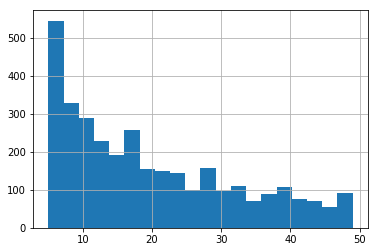

In [9]:
SeriesTV[SeriesTV['numVotes']<50]['numVotes'].hist(bins=20)

### We also note that the number of votes for most of the series is below 10, which will also be a bias at the time of the model

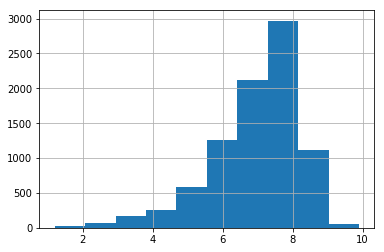

In [10]:
SeriesTV['averageRating'].hist()

#### Let's see how many episodes there are by gender and their duration

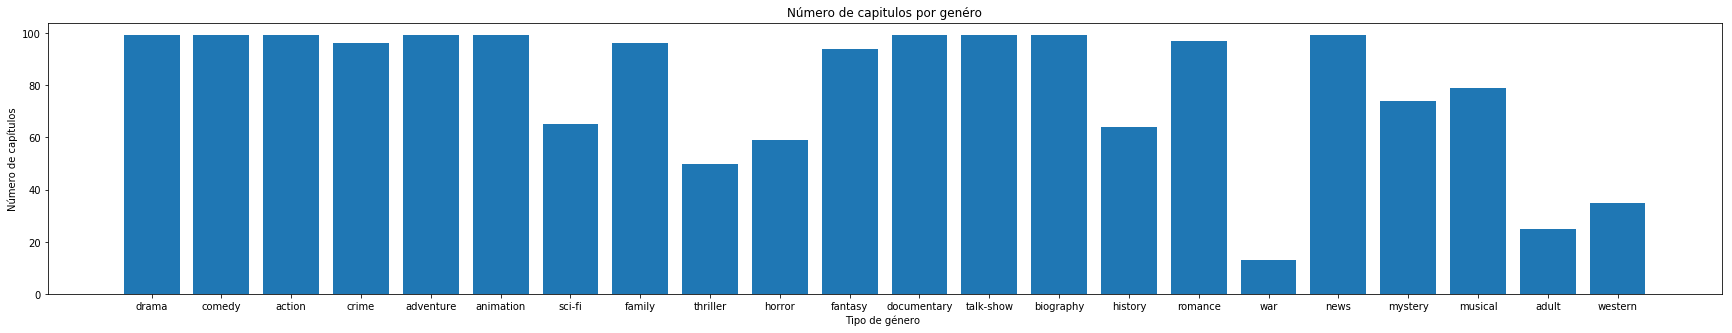

In [11]:
plt.subplots(figsize = (30,5))
plt.bar(SeriesTV['genre'], SeriesTV['numberOfEpisodes'])
plt.title("Número de capitulos por genéro")
plt.ylabel("Número de capítulos", fontsize = 10)
plt.xlabel("Tipo de género ", fontsize = 10);

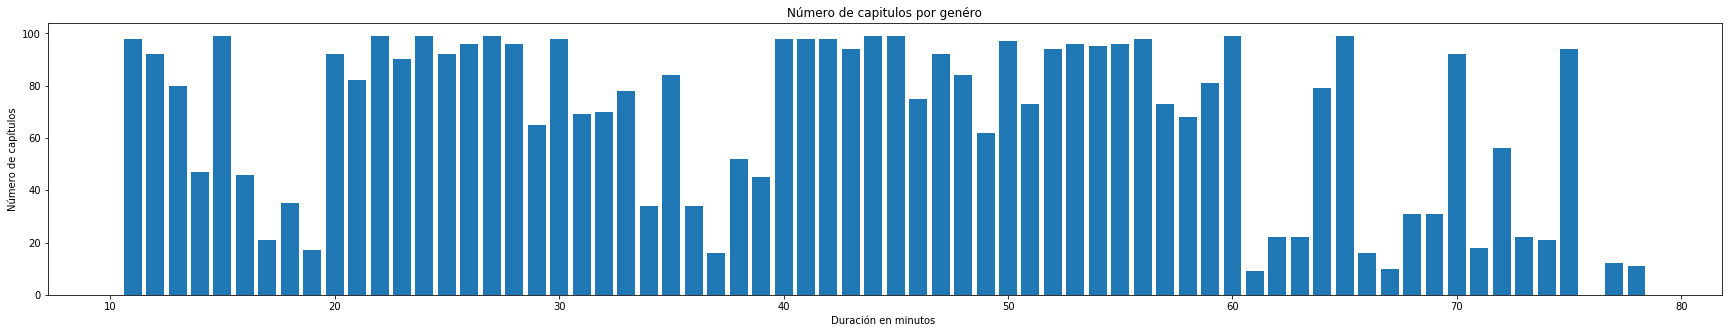

In [12]:
plt.subplots(figsize = (30,5))
plt.bar(SeriesTV['runtimeMinutes'], SeriesTV['numberOfEpisodes'])
plt.title("Número de capitulos por genéro")
plt.ylabel("Número de capítulos", fontsize = 10)
plt.xlabel("Duración en minutos ", fontsize = 10);

### Let's see if the variables are correlated with respect to the prediction variable

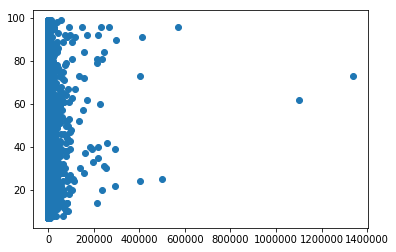

In [13]:
plt.scatter(SeriesTV['numVotes'], SeriesTV['numberOfEpisodes'])

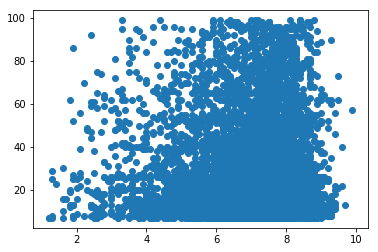

In [14]:
plt.scatter(SeriesTV['averageRating'], SeriesTV['numberOfEpisodes'])

### To be able to make any predictions with the data, it will be necessary to transform the gender variable into dummies and treat the rest of the data in the same scale